# **Intro to ML - Assignment-5**

### **Group 7**

Name: Shreya Sunil Telavane               
Student ID: 2398529

Name: Arka Prabhat Dey                    
Student ID: 2398420

Name: Lujia Wu                            
Student ID: 1854803

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [ ]:
# Load the dataset
from sklearn.datasets import load_iris
data = load_iris()
iris_features = pd.DataFrame(data['data'], columns=data['feature_names'])

# Standardize the features
scaler = StandardScaler()
iris_features_scaled = scaler.fit_transform(iris_features)

In [ ]:
# Perform Agglomerative Hierarchical Clustering with linkage='average'
silhouette_avg = []
for k in range(2, 10):  # k from 2 to 9
    clusterer = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    cluster_labels = clusterer.fit_predict(iris_features_scaled)
    silhouette_avg.append(silhouette_score(iris_features_scaled, cluster_labels))
    print(f"Silhouette score for k={k} (linkage='average'): {silhouette_avg[-1]:.4f}")

Silhouette score for k=2 (linkage='average'): 0.5818
Silhouette score for k=3 (linkage='average'): 0.4803
Silhouette score for k=4 (linkage='average'): 0.4067
Silhouette score for k=5 (linkage='average'): 0.3746
Silhouette score for k=6 (linkage='average'): 0.3248
Silhouette score for k=7 (linkage='average'): 0.3296
Silhouette score for k=8 (linkage='average'): 0.3293
Silhouette score for k=9 (linkage='average'): 0.3207


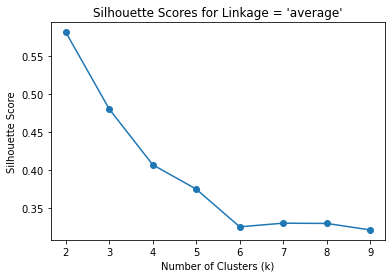

In [ ]:
# Plot silhouette scores for linkage='average'
plt.plot(range(2, 10), silhouette_avg, marker='o')
plt.title("Silhouette Scores for Linkage = 'average'")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
# Identify the optimal k based on silhouette scores for linkage='average'
optimal_k_avg = np.argmax(silhouette_avg) + 2
print(f"Optimal k for linkage='average': {optimal_k_avg}")

Optimal k for linkage='average': 2


In [ ]:
# Perform the same analysis with linkage='ward'
silhouette_avg_ward = []
for k in range(2, 10):  # k ranges from 2 to 9
    clusterer = AgglomerativeClustering(n_clusters=k, linkage='ward') 
    cluster_labels = clusterer.fit_predict(iris_features_scaled)
    silhouette_avg_ward.append(silhouette_score(iris_features_scaled, cluster_labels))
    print(f"Silhouette score for k={k} (linkage='ward'): {silhouette_avg_ward[-1]:.4f}")

Silhouette score for k=2 (linkage='ward'): 0.5770
Silhouette score for k=3 (linkage='ward'): 0.4467
Silhouette score for k=4 (linkage='ward'): 0.4006
Silhouette score for k=5 (linkage='ward'): 0.3306
Silhouette score for k=6 (linkage='ward'): 0.3149
Silhouette score for k=7 (linkage='ward'): 0.3170
Silhouette score for k=8 (linkage='ward'): 0.3109
Silhouette score for k=9 (linkage='ward'): 0.3114


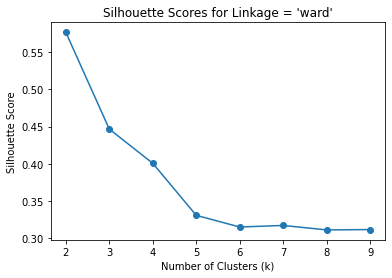

In [ ]:
# Plot silhouette scores for linkage='ward'
plt.plot(range(2, 10), silhouette_avg_ward, marker='o')
plt.title("Silhouette Scores for Linkage = 'ward'")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
# Identify the optimal k based on silhouette scores for linkage='ward'
optimal_k_ward = np.argmax(silhouette_avg_ward) + 2
print(f"Optimal k for linkage='ward': {optimal_k_ward}")

Optimal k for linkage='ward': 2


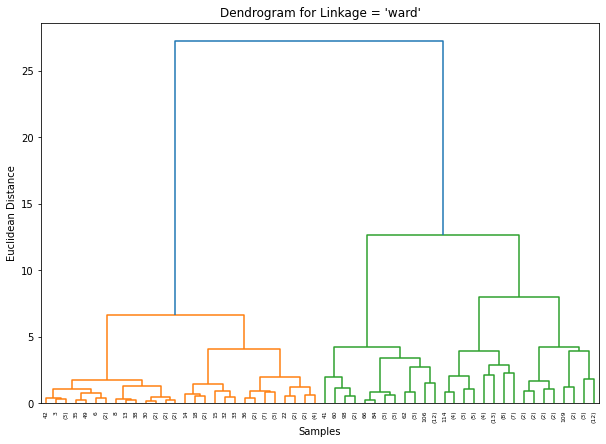

In [ ]:
# Dendrogram for linkage='ward'
linked_ward = linkage(iris_features_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linked_ward, truncate_mode='level', p=5)
plt.title("Dendrogram for Linkage = 'ward'")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

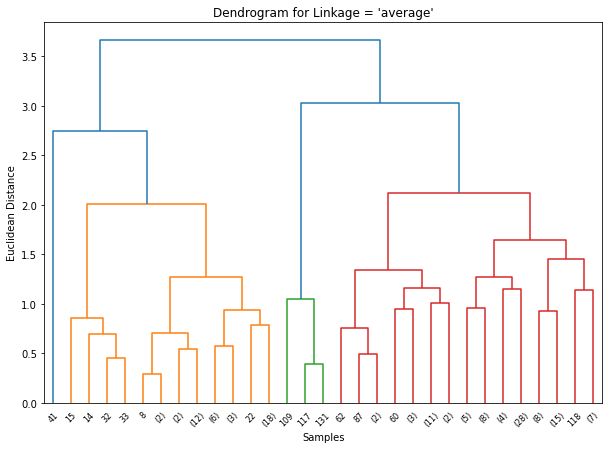

In [ ]:
# Dendrogram for linkage='average'
linked_avg = linkage(iris_features_scaled, method='average', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linked_avg, truncate_mode='level', p=5)
plt.title("Dendrogram for Linkage = 'average'")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()